A PayScale Inc. fez uma pesquisa de um ano com 1,2 milhão de americanos com apenas um diploma de bacharelado. 

Exploraremos os dados para responder a estas perguntas:

* Quais cursos têm os salários iniciais mais altos?
* Quais cursos têm os menores rendimentos após a faculdade?
* Há correlação entre salários iniciais e os redimentos de um profissional na metade de sua carreira?
* Quais diplomas têm o maior potencial de ganhos?
* Quais são os cursos de graduação de menor risco do ponto de vista de rendimentos?
* Os cursos de negócios, STEM (em inglês, Science, Technology, Engineering, Mathematics; e em português, Ciências, Tecnologia, Engenharia, Matemática) ou HASS (em inglês, Humanities, Arts, Social Science; e em português, Humanidades, Artes, Ciências Sociais) ganham mais em média? 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Importando bibliotecas IO, e auxiliares do Google Colab para facilitar a importação do nosso dataset
import io
from google.colab import drive

In [2]:
#Fazendo Google Colab "enxergar" nosso diretório do Google Drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/data analysis/100 days of code/salaries_by_college_major.csv')

## Análise Inicial


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Undergraduate Major                51 non-null     object 
 1   Starting Median Salary             50 non-null     float64
 2   Mid-Career Median Salary           50 non-null     float64
 3   Mid-Career 10th Percentile Salary  50 non-null     float64
 4   Mid-Career 90th Percentile Salary  50 non-null     float64
 5   Group                              50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


In [5]:
df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


### Cleaning 
A última linha possui valores em branco, esta linha será excluída a seguir. 

In [6]:
clean_df = df.dropna()
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,40800.0,78200.0,41200.0,168000.0,HASS
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS


## Análise Exploratória de dados

Para ter uma ideia geral dos números, utilizamos o método *.decribe()*


In [8]:
clean_df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000
mean,44310.000000,74786.00000,43408.000000,142766.000000
std,9360.866217,16088.40386,12000.779567,27851.249267
min,34000.000000,52000.00000,26700.000000,96400.000000
25%,37050.000000,60825.00000,34825.000000,124250.000000
50%,40850.000000,72000.00000,39400.000000,145500.000000
75%,49875.000000,88750.00000,49850.000000,161750.000000
max,74300.000000,107000.00000,71900.000000,210000.000000


Vamos começar respondendo quais **cursos têm os maiores salários iniciais**. 

In [14]:
starting_salary = clean_df[['Undergraduate Major', 'Starting Median Salary']].sort_values(by='Starting Median Salary', ascending=False)
starting_salary.head(10)


,Undergraduate Major,Starting Median Salary
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0
1,Aerospace Engineering,57700.0
30,Industrial Engineering,57700.0
13,Computer Science,55900.0
40,Nursing,54200.0
10,Civil Engineering,53900.0


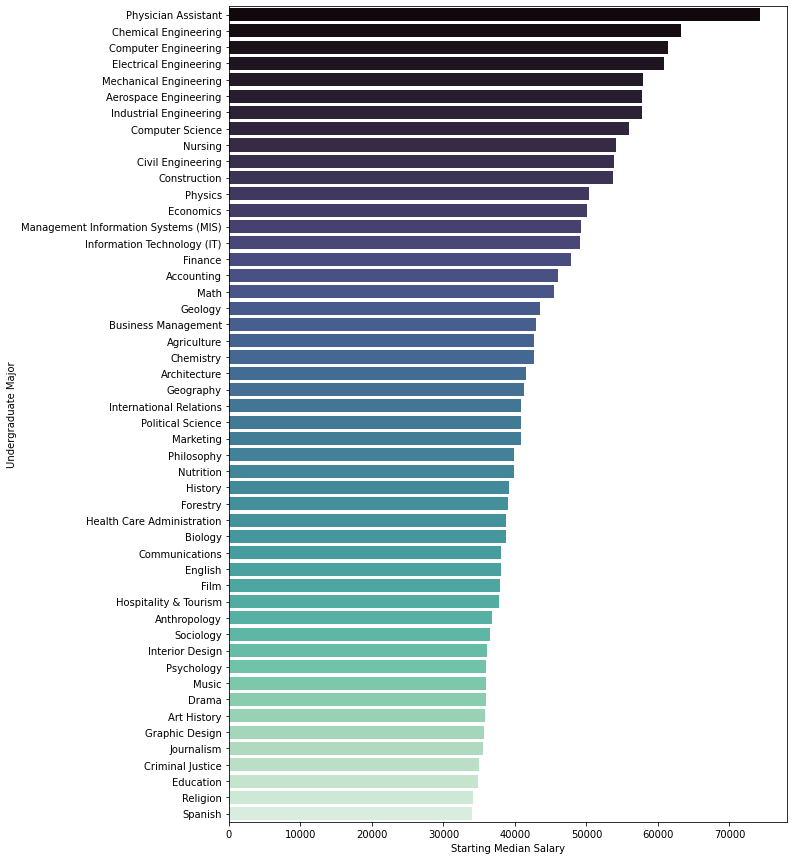

In [15]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax.set_yticklabels(starting_salary['Undergraduate Major'], rotation='horizontal', fontsize='medium')
figure1 = sns.barplot(y = 'Undergraduate Major', x= 'Starting Median Salary', data=starting_salary, palette="mako")
plt.show()

O maior salário inicial é de um assistente médico $74.300,00. 

Carreiras de engenharia também têm alta remuneração no início da jornada profissional, o oposto para profissionais que se formam em espanhol -- que tem o menor salário inicial, de $34 mil --, religião e educação. 

Vamos analisar a seguir **o ganho para um funcionário no meio de sua carreira**. 


In [17]:
mid_career = clean_df[['Undergraduate Major', 'Mid-Career Median Salary']].sort_values(by='Mid-Career Median Salary', ascending=False)
mid_career.tail(10)

,Undergraduate Major,Mid-Career Median Salary
48,Sociology,58200.0
29,Hospitality & Tourism,57500.0
16,Drama,56900.0
15,Criminal Justice,56300.0
41,Nutrition,55300.0
39,Music,55000.0
32,Interior Design,53200.0
49,Spanish,53100.0
18,Education,52000.0
47,Religion,52000.0


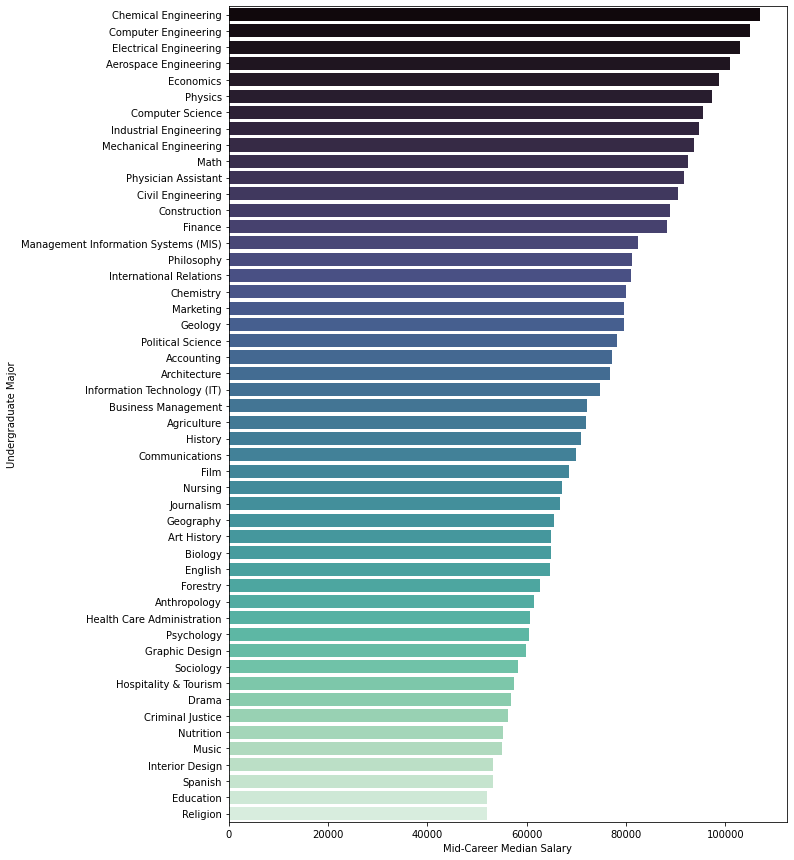

In [18]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax.set_yticklabels(mid_career['Undergraduate Major'], rotation='horizontal', fontsize='medium')
figure1 = sns.barplot(y = 'Undergraduate Major', x= 'Mid-Career Median Salary', data=mid_career, palette="mako")
plt.show()

Os profissionais formados em religião, educação e espanhol continuam na parte inferior do gráfico quando olhamos para o salário médio durante a metade da carreira. 


**Qual a correlação entre o salário inicial e do meio de uma carreira de um profissional?**



In [32]:
clean_df[['Starting Median Salary', 'Mid-Career Median Salary']].corr()

,Starting Median Salary,Mid-Career Median Salary
Starting Median Salary,1.00,0.85
Mid-Career Median Salary,0.85,1.00


Text(0, 0.5, 'Mid Salary')

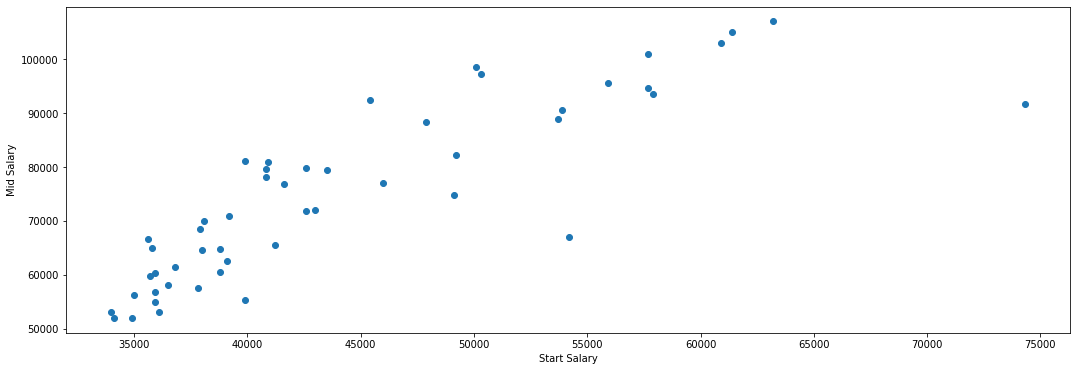

In [33]:
f, ax = plt.subplots(figsize=(18, 6)) 
ax.scatter(clean_df['Starting Median Salary'], clean_df['Mid-Career Median Salary'])
ax.set_xlabel("Start Salary")
ax.set_ylabel("Mid Salary")

A correlação entre o salário inicial e de início da carreira é de 0.85, uma correlação positiva alta. Isso significa que para as profissões que aparecem nessa pesquisa, o começo da jornada de trabalho -- em termos de ganho -- é essencial para determinar o sucesso desses profissionais. 

**Quais são as graduações com menor risco e aquelas com maior potencial de ganho?** 

Uma especialização de baixo risco representa aquela em que há uma pequena diferença entre os salários mais baixos e os mais altos. Logo, se a diferença entre os rendimentos do 10º e 90º percentil do curso de graduação for pequena, você poderá ter mais certeza sobre o salário depois de se formar. 

In [19]:
    spread_col = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
    clean_df.insert(1, 'Spread', spread_col)
    clean_df.head()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,109800.0,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,96700.0,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,113700.0,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,104200.0,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,85400.0,41600.0,76800.0,50600.0,136000.0,Business


As profissões com menor risco são enfermagem, assitente médico e nutricionistas, como observamos a seguir. 

In [20]:
spread = clean_df [['Undergraduate Major', 'Spread']]
spread.sort_values(by='Spread', ascending=True).head(10)

,Undergraduate Major,Spread
40,Nursing,50700.0
43,Physician Assistant,57600.0
41,Nutrition,65300.0
49,Spanish,65400.0
27,Health Care Administration,66400.0
47,Religion,66700.0
23,Forestry,70000.0
32,Interior Design,71300.0
18,Education,72700.0
15,Criminal Justice,74800.0


As profissões com maior diferença entre os rendimentos do 10º e 90º percentil são consideradas as de maior risco, são elas: economia, finanças e matemática. No entanto, a maior parte delas também representam as profissões com maior potencial.

In [31]:
spread = clean_df [['Undergraduate Major', 'Spread']]
spread.sort_values(by='Spread', ascending=False).head(10)

,Undergraduate Major,Spread
17,Economics,"159,400.00"
22,Finance,"147,800.00"
37,Math,"137,800.00"
36,Marketing,"132,900.00"
42,Philosophy,"132,500.00"
45,Political Science,"126,800.00"
8,Chemical Engineering,"122,100.00"
44,Physics,"122,000.00"
33,International Relations,"118,800.00"
16,Drama,"116,300.00"


Como observamos na tabela a seguir, os profissionais com maior potencial de ganho são aqueles formados em economia, finança e engenharia química. Para chegar nessa observação, utilizamos o 90º percentil do salário no meio da carreira de um profissional. 

In [23]:
percentile_90th = df[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']]
percentile_90th.sort_values(by='Mid-Career 90th Percentile Salary', ascending=False).head(10)


,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,210000.0
22,Finance,195000.0
8,Chemical Engineering,194000.0
37,Math,183000.0
44,Physics,178000.0
36,Marketing,175000.0
30,Industrial Engineering,173000.0
14,Construction,171000.0
45,Political Science,168000.0
42,Philosophy,168000.0


Por fim, olhamos para a **relação entre o ganho e as profissões da área de negócios, STEM E HASS**. 

In [29]:
pd.options.display.float_format = '{:,.2f}'.format 
clean_df.groupby(['Group']).mean()


,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,"103,958.33","44,633.33","75,083.33","43,566.67","147,525.00"
HASS,"95,218.18","37,186.36","62,968.18","34,145.45","129,363.64"
STEM,"101,600.00","53,862.50","90,812.50","56,025.00","157,625.00"


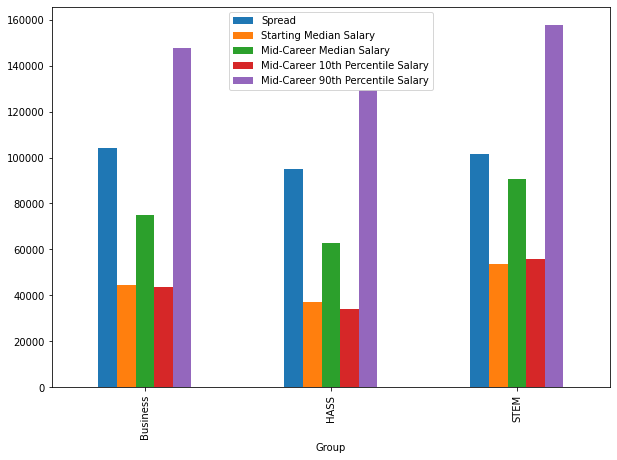

In [30]:
clean_df.groupby('Group').mean().plot(kind='bar',figsize=(10,7)) 
plt.show() 